In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from pmlb import fetch_data, classification_dataset_names
from scipy import stats

import random as rd
import math

import plotly

import warnings
warnings.filterwarnings('ignore')

import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
meta = np.load("meta.npy")
#num_precent,sample_num,feature_num,class_num,bin_multi,imbalance
bin_index = np.array(np.where(meta[:,4]==0)[0],dtype=np.int)
multi_index = np.where(meta[:,4]==1)[0]
bin_meta = meta[bin_index,:]
multi_meta = meta[multi_index,:]

small_index = np.array(np.where(meta[:,1]<1000)[0])
large_index = np.array(np.where(meta[:,1]>5000)[0])

balance_index = np.array(np.where(meta[:,5]<=0.5)[0])
inbalance_index = np.array(np.where(meta[:,5]>0.6)[0])

In [3]:
[len(bin_index),len(multi_index),len(small_index),len(large_index),len(inbalance_index),len(balance_index)]

[91, 75, 95, 26, 24, 137]

In [4]:
pd.DataFrame(meta).describe()

,0,1,2,3,4,5
count,166.000000,1.660000e+02,166.000000,166.000000,166.000000,166.000000
mean,0.480629,1.381870e+04,35.590361,4.156627,0.451807,0.346646
std,0.455907,8.884587e+04,102.084996,3.951162,0.499178,0.868384
min,0.000000,3.200000e+01,2.000000,2.000000,0.000000,0.000000
25%,0.000000,2.740000e+02,8.000000,2.000000,0.000000,0.001463
50%,0.375235,6.900000e+02,13.000000,2.000000,0.000000,0.077653
75%,1.000000,3.180250e+03,29.000000,5.000000,1.000000,0.294897
max,1.500000,1.025009e+06,1000.000000,26.000000,1.000000,8.406173


In [5]:
epc = np.load("outpc.npy")

In [6]:
# n_estimators: range(10,70,10):
# max_features: [0.05,0.1,0.15,0.2,0.3]:
# min_samples_split: range(10,70,10):
# min_samples_leaf: [0.05,0.1,0.15,0.2,0.3]:
# depth: [depth,int(math.sqrt(depth)),int(math.log2(depth))]:

In [7]:
##On Error
# plt.figure(figsize = (25,5))
# for j in range(0,5):
#     test_err = []
#     for i in range(0,166):
# # remove the small size dataset
#         if  np.all(small_index !=i) :
#             test_err_i = np.array(epc[i,j])[:,4]
#             test_err.append(test_err_i)
#     np_test_err = np.array(test_err)
#     np_test_err.shape
#     plt.subplot(151+j)
#     plt.boxplot(np_test_err)
# plt.show()

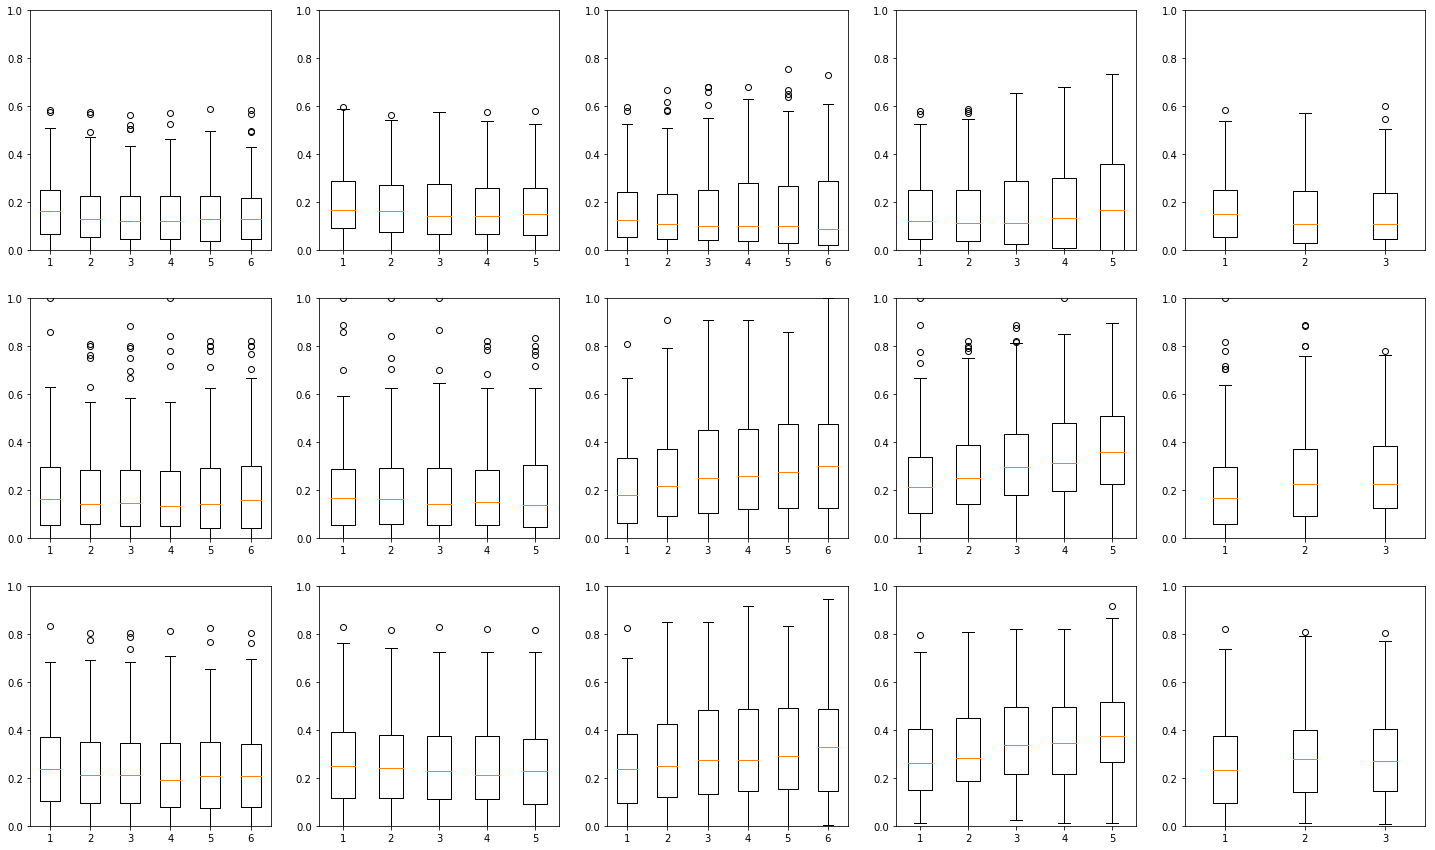

In [29]:

##On bias
plt.figure(figsize = (25,15))
for j in range(0,5):
    test_err = []
    for i in range(0,166):
        test_err_i = np.array(epc[i,j])[:,1]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(3,5,1+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])

##On variance
for j in range(0,5):
    test_err = []
    for i in range(0,166):
        test_err_i = np.array(epc[i,j])[:,0]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(3,5,6+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])

##On Error 


for j in range(0,5):
    test_err = []
    for i in range(0,166):
#         if i != 121: # remove the small size dataset
        test_err_i = np.array(epc[i,j])[:,4]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(3,5,11+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.savefig("pic1.6.1.jpg")
plt.show()

# Binary_index 

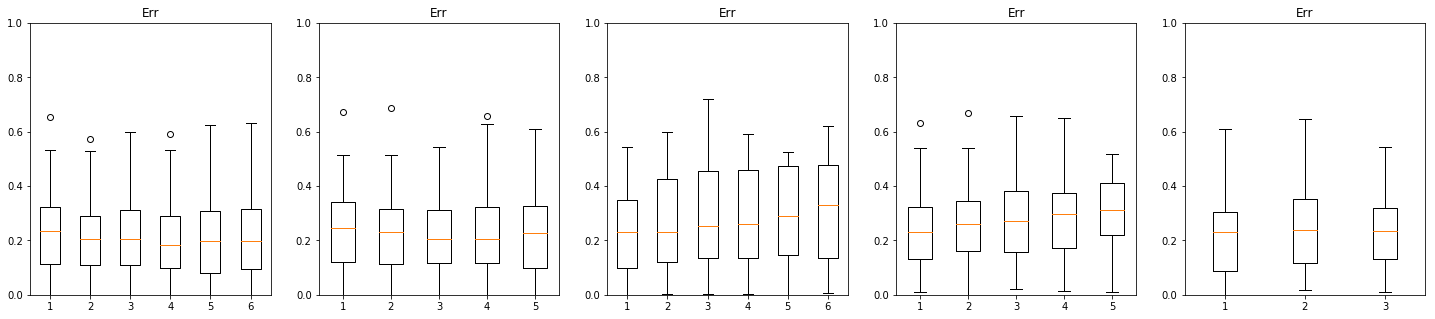

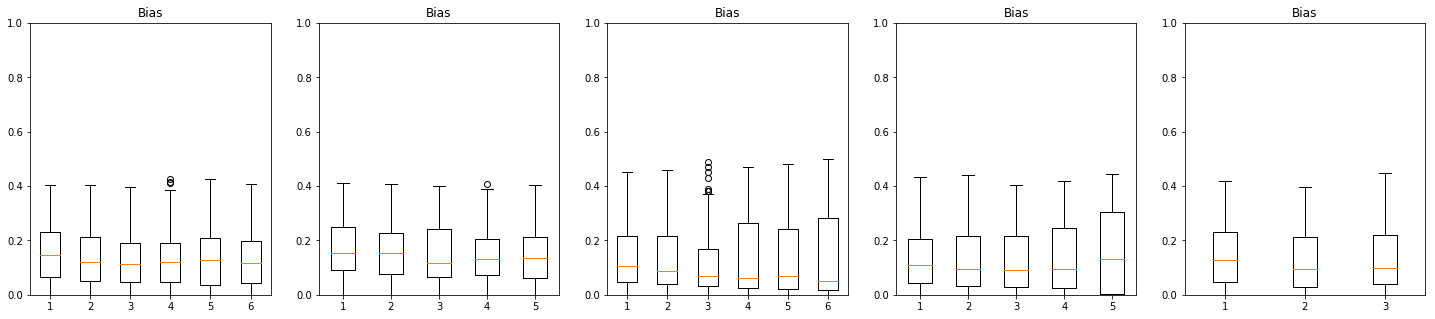

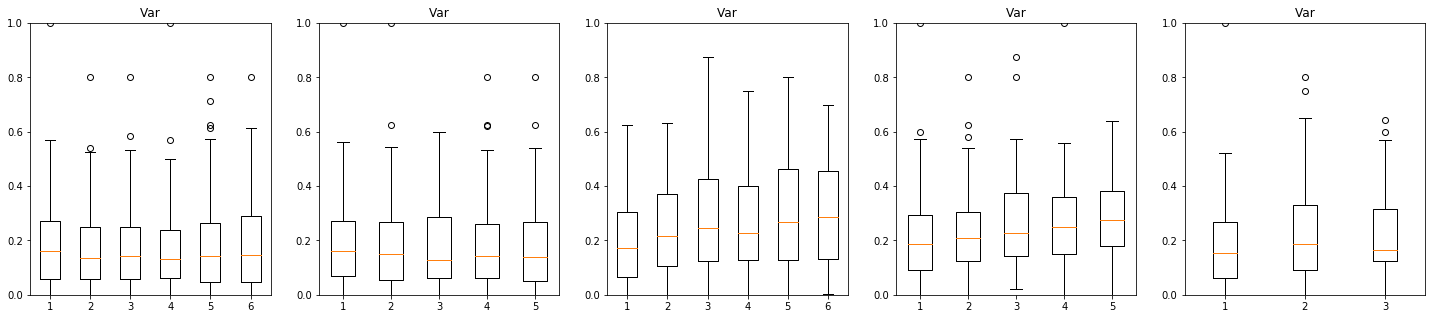

In [9]:
##On Error 
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in bin_index:
#         if i != 121: # remove the small size dataset
        test_err_i = np.array(epc[i,j])[:,4]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.title("Err")
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

##On bias
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in bin_index:
        test_err_i = np.array(epc[i,j])[:,1]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.title("Bias")
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()
##On variance
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in bin_index:
        test_err_i = np.array(epc[i,j])[:,0]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.title("Var")
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

# Multi index

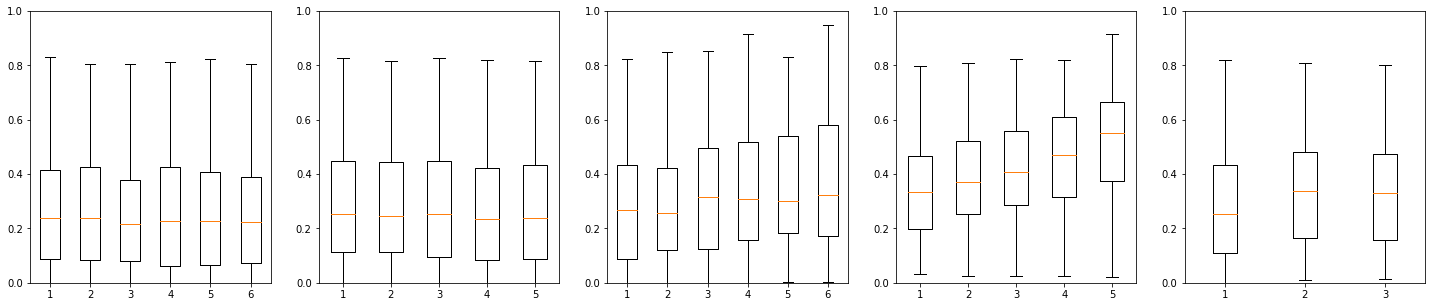

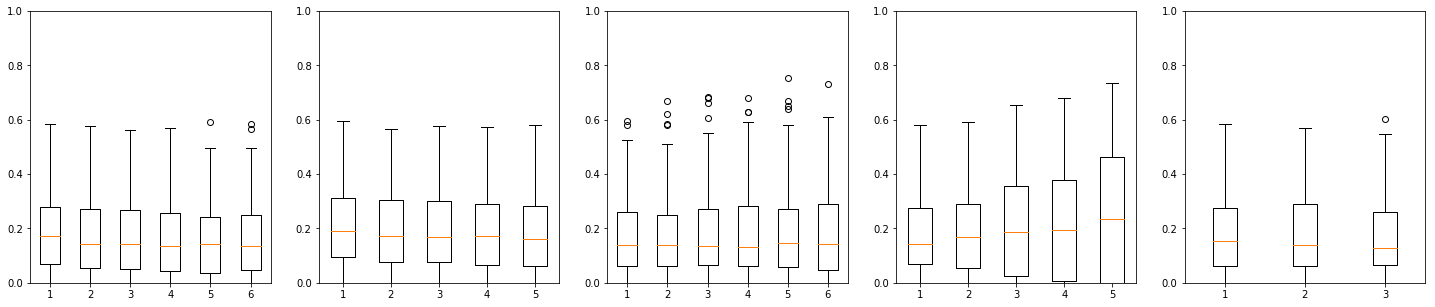

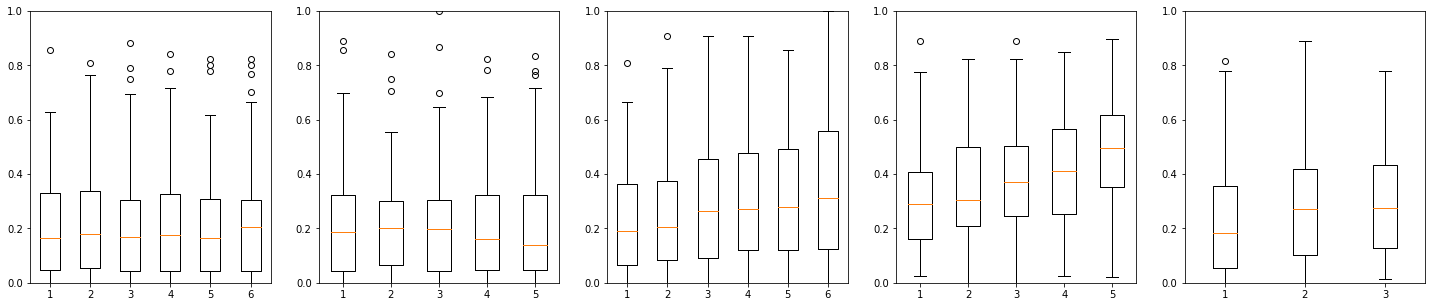

In [10]:
##On Error 
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in multi_index:
#         if i != 121: # remove the small size dataset
        test_err_i = np.array(epc[i,j])[:,4]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

##On bias
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in multi_index:
        test_err_i = np.array(epc[i,j])[:,1]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()
##On variance
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in multi_index:
        test_err_i = np.array(epc[i,j])[:,0]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

# Small index

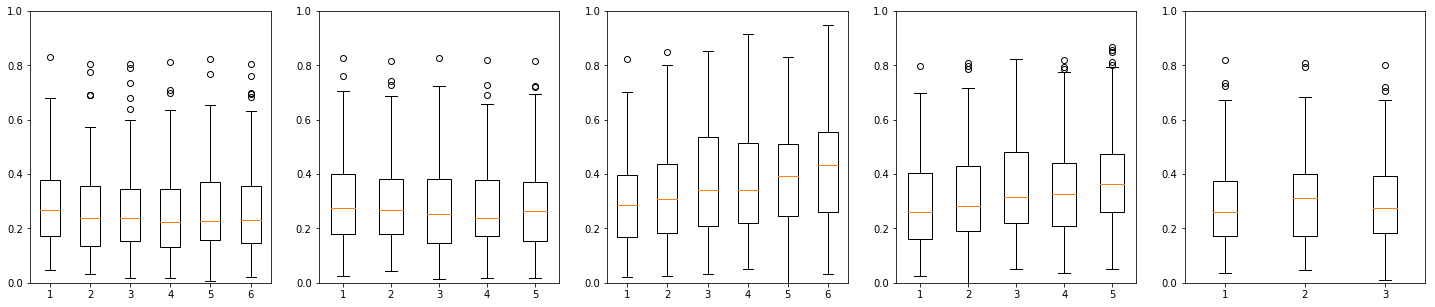

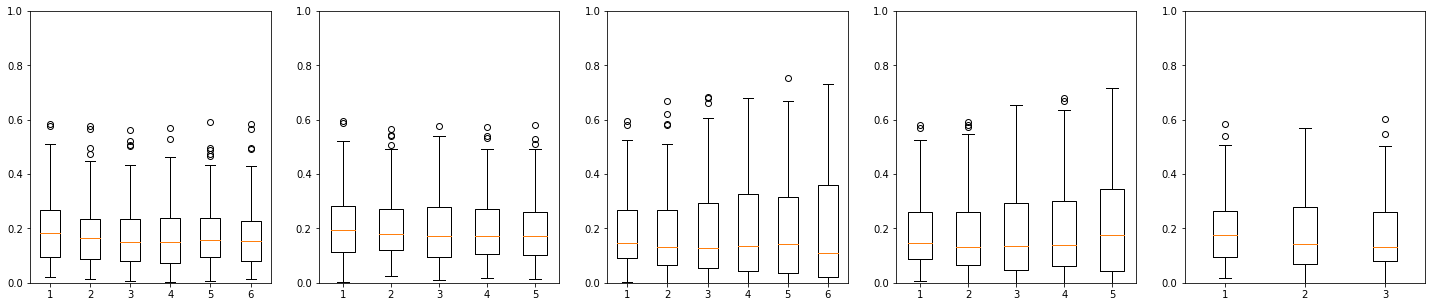

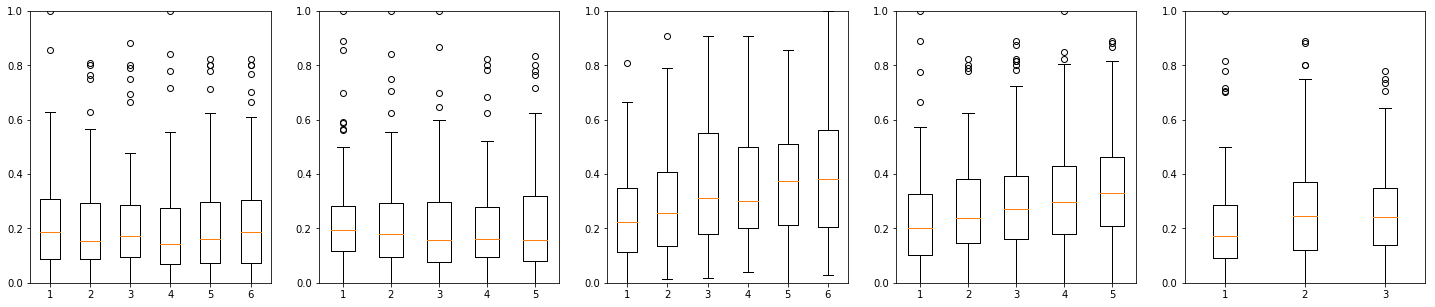

In [11]:
##On Error 
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in small_index:
#         if i != 121: # remove the small size dataset
        test_err_i = np.array(epc[i,j])[:,4]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

##On bias
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in small_index:
        test_err_i = np.array(epc[i,j])[:,1]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()
##On variance
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in small_index:
        test_err_i = np.array(epc[i,j])[:,0]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

# Large index

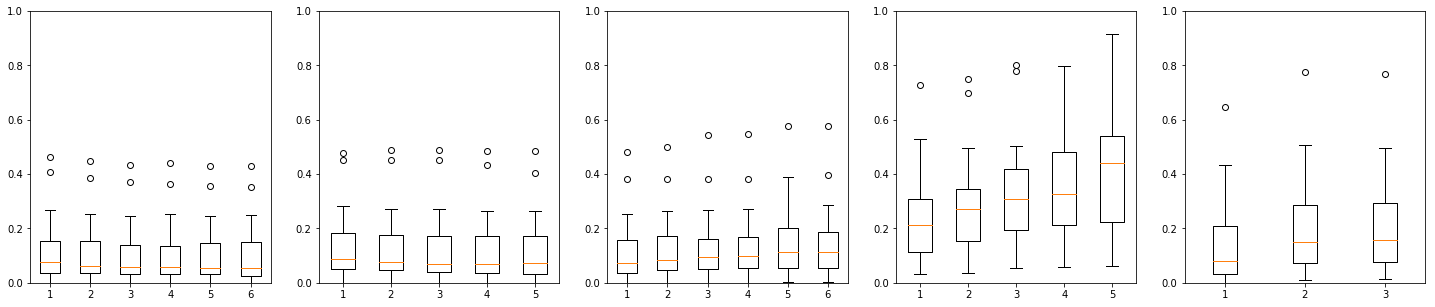

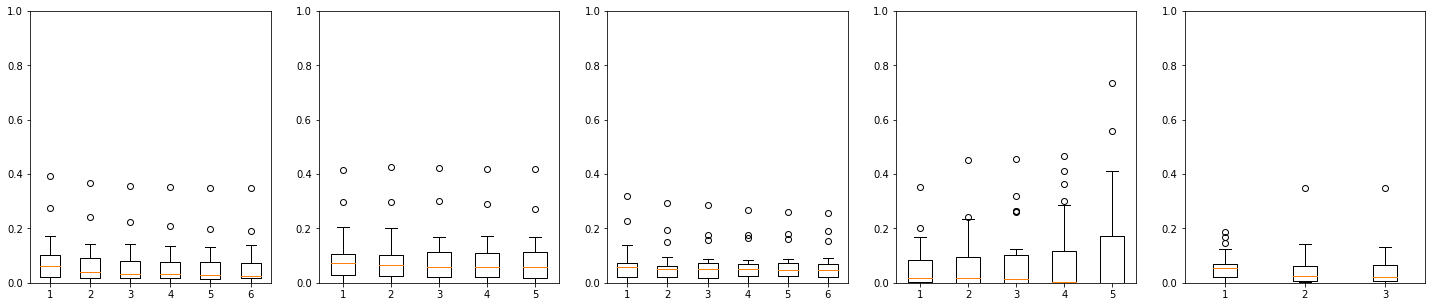

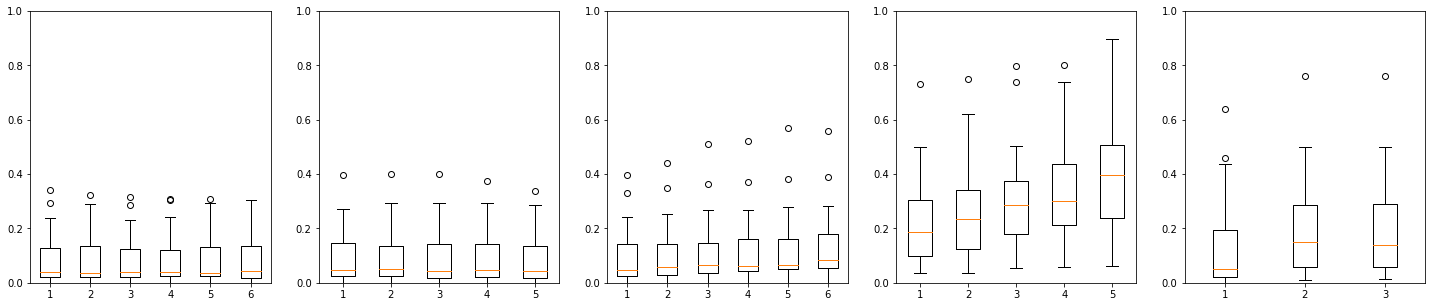

In [12]:
##On Error 
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in large_index:
#         if i != 121: # remove the small size dataset
        test_err_i = np.array(epc[i,j])[:,4]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

##On bias
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in large_index:
        test_err_i = np.array(epc[i,j])[:,1]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()
##On variance
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in large_index:
        test_err_i = np.array(epc[i,j])[:,0]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

# Inbalance Index

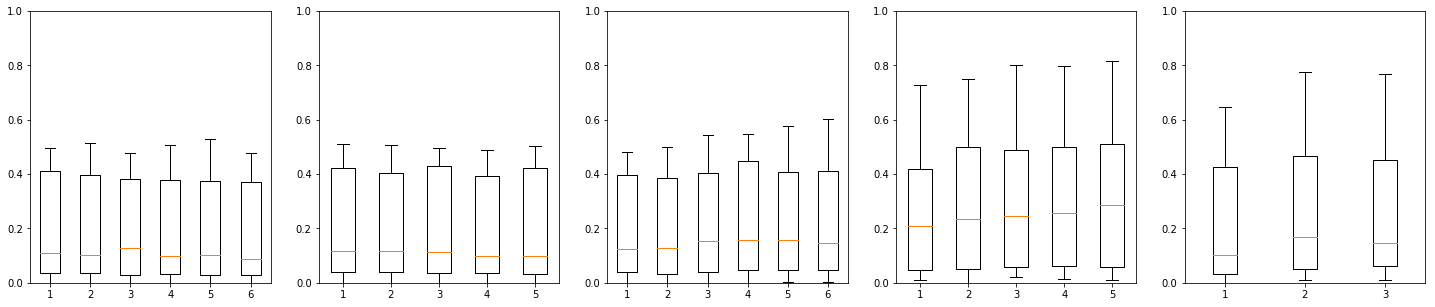

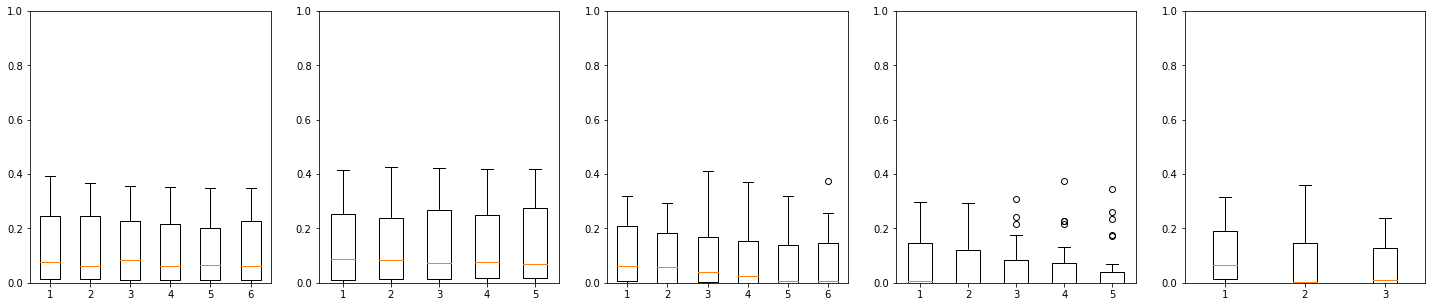

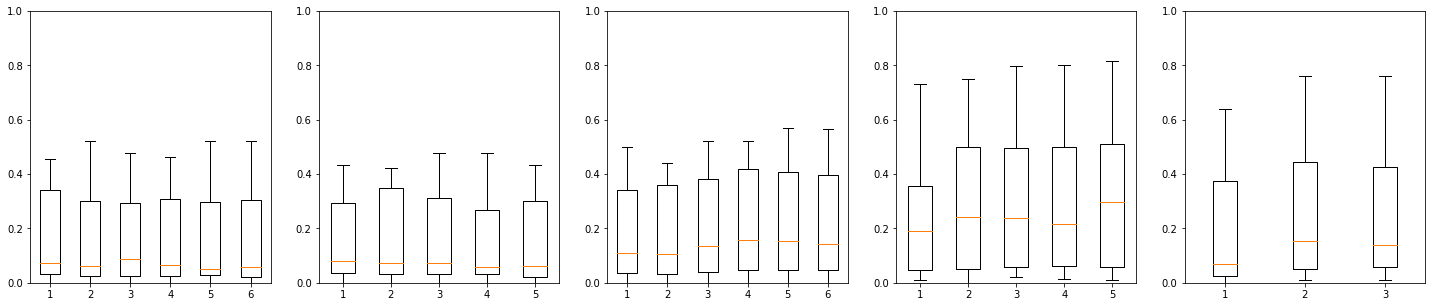

In [13]:
##On Error 
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in inbalance_index:
#         if i != 121: # remove the small size dataset
        test_err_i = np.array(epc[i,j])[:,4]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

##On bias
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in inbalance_index:
        test_err_i = np.array(epc[i,j])[:,1]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()
##On variance
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in inbalance_index:
        test_err_i = np.array(epc[i,j])[:,0]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

# Balance Index

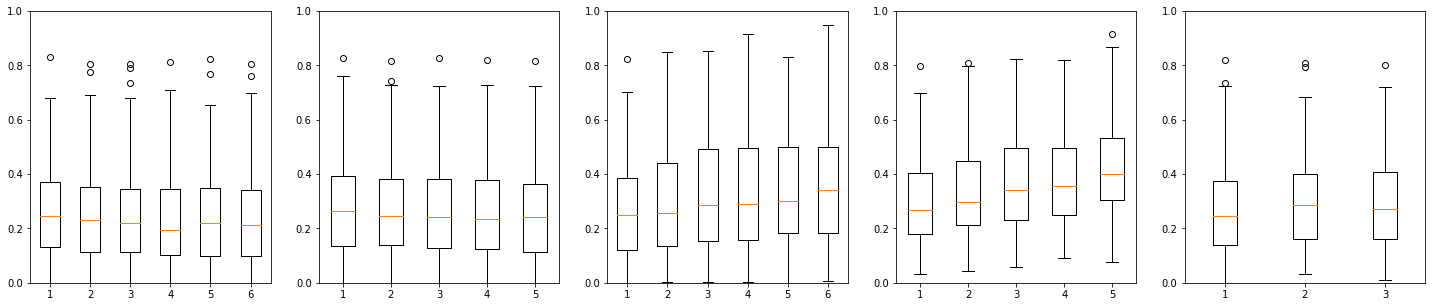

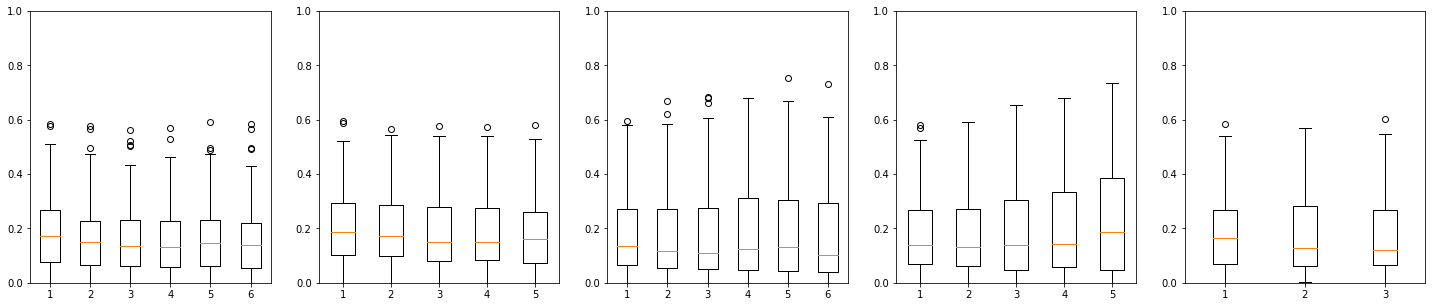

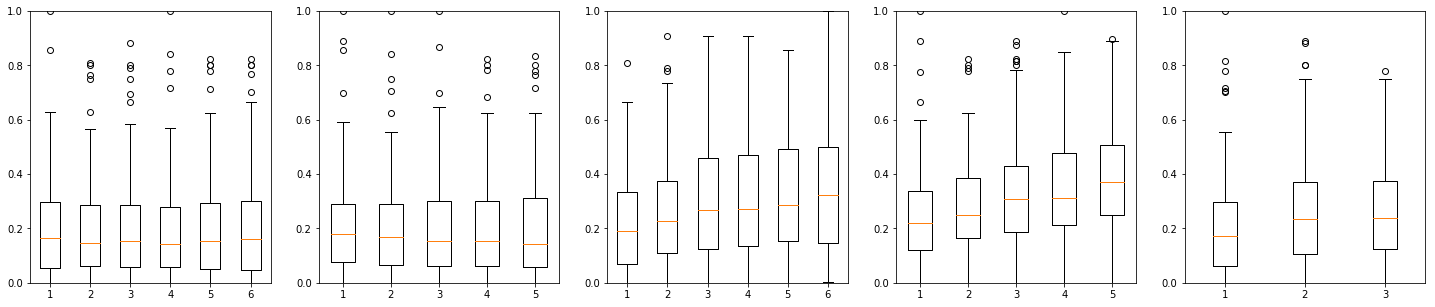

In [14]:
##On Error 
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in balance_index:
#         if i != 121: # remove the small size dataset
        test_err_i = np.array(epc[i,j])[:,4]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

##On bias
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in balance_index:
        test_err_i = np.array(epc[i,j])[:,1]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()
##On variance
plt.figure(figsize = (25,5))
for j in range(0,5):
    test_err = []
    for i in balance_index:
        test_err_i = np.array(epc[i,j])[:,0]
        test_err.append(test_err_i)
    np_test_err = np.array(test_err)
    np_test_err.shape
    plt.subplot(151+j)
    plt.boxplot(np_test_err)
    plt.ylim([0,1])
plt.show()

In [15]:
epc.shape

(166, 5)

In [16]:
x = epc[:,1]

In [17]:
# n_estimators: range(10,70,10):
# max_features: [0.05,0.1,0.15,0.2,0.3]:
# min_samples_split: range(10,70,10):
# min_samples_leaf: [0.05,0.1,0.15,0.2,0.3]:
# depth: [depth,int(math.sqrt(depth)),int(math.log2(depth))]:

In [18]:
out_est = []
for i in range(0,166):
    x = epc[i,0]
    out_est.append(x)

out_maxf = []
for i in range(0,166):
    x = epc[i,1]
    out_maxf.append(x)
    
out_minss = []
for i in range(0,166):
    x = epc[i,2]
    out_minss.append(x)
    
out_minsl = []
for i in range(0,166):
    x = epc[i,3]
    out_minsl.append(x)
    
out_dep = []
for i in range(0,166):
    x = epc[i,4]
    out_dep.append(x)

In [19]:
np_out_est = np.array(out_est)
np_out_maxf = np.array(out_maxf)
np_out_minss = np.array(out_minss)
np_out_minsl = np.array(out_minsl)
np_out_dep = np.array(out_dep)


In [20]:
np_out_est_bias = np.transpose(np_out_est[:,:,0])
np_out_est_var = np.transpose(np_out_est[:,:,1])
np_out_est_loss = np.transpose(np_out_est[:,:,4])

np_out_maxf_bias = np.transpose(np_out_maxf[:,:,0])
np_out_maxf_var = np.transpose(np_out_maxf[:,:,1])
np_out_maxf_loss = np.transpose(np_out_maxf[:,:,4])

np_out_minss_bias = np.transpose(np_out_minss[:,:,0])
np_out_minss_var = np.transpose(np_out_minss[:,:,1])
np_out_minss_loss = np.transpose(np_out_minss[:,:,4])

np_out_minsl_bias = np.transpose(np_out_minsl[:,:,0])
np_out_minsl_var = np.transpose(np_out_minsl[:,:,1])
np_out_minsl_loss = np.transpose(np_out_minsl[:,:,4])

np_out_dep_bias = np.transpose(np_out_dep[:,:,0])
np_out_dep_var = np.transpose(np_out_dep[:,:,1])
np_out_dep_loss = np.transpose(np_out_dep[:,:,4])

In [21]:
##No block case

print(stats.f_oneway(*np_out_est_bias))

print(stats.f_oneway(*np_out_est_var))

print(stats.f_oneway(*np_out_est_loss))

print(stats.f_oneway(*np_out_maxf_bias))

print(stats.f_oneway(*np_out_maxf_var))

print(stats.f_oneway(*np_out_maxf_loss))

print(stats.f_oneway(*np_out_minss_bias))

print(stats.f_oneway(*np_out_minss_var))

print(stats.f_oneway(*np_out_minss_loss))

print(stats.f_oneway(*np_out_minsl_bias))

print(stats.f_oneway(*np_out_minsl_var))

print(stats.f_oneway(*np_out_minsl_loss))

print(stats.f_oneway(*np_out_dep_bias))

print(stats.f_oneway(*np_out_dep_var))

print(stats.f_oneway(*np_out_dep_loss))

F_onewayResult(statistic=0.14160298747616495, pvalue=0.982480353283391)
F_onewayResult(statistic=0.9041469407330233, pvalue=0.4775758790210589)
F_onewayResult(statistic=0.4231566360974741, pvalue=0.8327695283265756)
F_onewayResult(statistic=0.27802289311877065, pvalue=0.8922537935359723)
F_onewayResult(statistic=0.5959122963992871, pvalue=0.665684412995898)
F_onewayResult(statistic=0.4283109825535857, pvalue=0.7882565539131965)
F_onewayResult(statistic=6.404573471894678, pvalue=7.248842713340603e-06)
F_onewayResult(statistic=0.06789311188243626, pvalue=0.9968241630165254)
F_onewayResult(statistic=3.7487387117804984, pvalue=0.002284616368653172)
F_onewayResult(statistic=10.428803200391592, pvalue=3.036787340090305e-08)
F_onewayResult(statistic=2.0128724542942003, pvalue=0.0907700594345605)
F_onewayResult(statistic=10.126238258163152, pvalue=5.262078930662775e-08)
F_onewayResult(statistic=4.022257291549154, pvalue=0.018501135070252684)
F_onewayResult(statistic=0.8061635132262789, pvalue=

In [22]:
## Block case

In [23]:
row = np.tile(range(0,166),6)
col = np.repeat(range(0,6),166)
pd_out_est_bias = pd.DataFrame(np.transpose([np.concatenate(np_out_est_bias),row,col]),columns=["value","row","col"])
pd_out_est_var = pd.DataFrame(np.transpose([np.concatenate(np_out_est_var),row,col]),columns=["value","row","col"])
pd_out_est_loss = pd.DataFrame(np.transpose([np.concatenate(np_out_est_loss),row,col]),columns=["value","row","col"])

row = np.tile(range(0,166),5)
col = np.repeat(range(0,5),166)
pd_out_maxf_bias = pd.DataFrame(np.transpose([np.concatenate(np_out_maxf_bias),row,col]),columns=["value","row","col"])
pd_out_maxf_var = pd.DataFrame(np.transpose([np.concatenate(np_out_maxf_var),row,col]),columns=["value","row","col"])
pd_out_maxf_loss = pd.DataFrame(np.transpose([np.concatenate(np_out_maxf_loss),row,col]),columns=["value","row","col"])

row = np.tile(range(0,166),6)
col = np.repeat(range(0,6),166)
pd_out_minss_bias = pd.DataFrame(np.transpose([np.concatenate(np_out_minss_bias),row,col]),columns=["value","row","col"])
pd_out_minss_var = pd.DataFrame(np.transpose([np.concatenate(np_out_minss_var),row,col]),columns=["value","row","col"])
pd_out_minss_loss = pd.DataFrame(np.transpose([np.concatenate(np_out_minss_loss),row,col]),columns=["value","row","col"])

row = np.tile(range(0,166),5)
col = np.repeat(range(0,5),166)
pd_out_minsl_bias = pd.DataFrame(np.transpose([np.concatenate(np_out_minsl_bias),row,col]),columns=["value","row","col"])
pd_out_minsl_var = pd.DataFrame(np.transpose([np.concatenate(np_out_minsl_var),row,col]),columns=["value","row","col"])
pd_out_minsl_loss = pd.DataFrame(np.transpose([np.concatenate(np_out_minsl_loss),row,col]),columns=["value","row","col"])

row = np.tile(range(0,166),3)
col = np.repeat(range(0,3),166)
pd_out_dep_bias = pd.DataFrame(np.transpose([np.concatenate(np_out_dep_bias),row,col]),columns=["value","row","col"])
pd_out_dep_var = pd.DataFrame(np.transpose([np.concatenate(np_out_dep_var),row,col]),columns=["value","row","col"])
pd_out_dep_loss = pd.DataFrame(np.transpose([np.concatenate(np_out_dep_loss),row,col]),columns=["value","row","col"])




In [24]:
formula = "value ~ C(row) + C(col)"
print("EST")
res = anova_lm(ols(formula,pd_out_est_bias).fit())
print(res)
res = anova_lm(ols(formula,pd_out_est_var).fit())
print(res)
res = anova_lm(ols(formula,pd_out_est_loss).fit())
print(res)
print("\n"+"MAXF")
res = anova_lm(ols(formula,pd_out_maxf_bias).fit())
print(res)
res = anova_lm(ols(formula,pd_out_maxf_var).fit())
print(res)
res = anova_lm(ols(formula,pd_out_maxf_loss).fit())
print(res)
print("\n"+"MINSS")
res = anova_lm(ols(formula,pd_out_minss_bias).fit())
print(res)
res = anova_lm(ols(formula,pd_out_minss_var).fit())
print(res)
res = anova_lm(ols(formula,pd_out_minss_loss).fit())
print(res)
print("\n"+"MINSL")
res = anova_lm(ols(formula,pd_out_minsl_bias).fit())
print(res)
res = anova_lm(ols(formula,pd_out_minsl_var).fit())
print(res)
res = anova_lm(ols(formula,pd_out_minsl_loss).fit())
print(res)
print("\n"+"DEPTH")
res = anova_lm(ols(formula,pd_out_dep_bias).fit())
print(res)
res = anova_lm(ols(formula,pd_out_dep_var).fit())
print(res)
res = anova_lm(ols(formula,pd_out_dep_loss).fit())
print(res)

EST
             df     sum_sq   mean_sq          F    PR(>F)
C(row)    165.0  29.313443  0.177657  52.447353  0.000000
C(col)      5.0   0.022963  0.004593   1.355786  0.238832
Residual  825.0   2.794559  0.003387        NaN       NaN
             df     sum_sq   mean_sq           F        PR(>F)
C(row)    165.0  15.524692  0.094089  167.821913  0.000000e+00
C(col)      5.0   0.073004  0.014601   26.042734  1.815653e-24
Residual  825.0   0.462535  0.000561         NaN           NaN
             df     sum_sq   mean_sq           F        PR(>F)
C(row)    165.0  29.682043  0.179891  150.530706  0.000000e+00
C(col)      5.0   0.065542  0.013108   10.968975  3.067428e-10
Residual  825.0   0.985913  0.001195         NaN           NaN

MAXF
             df     sum_sq   mean_sq          F         PR(>F)
C(row)    165.0  24.089466  0.145997  39.612133  7.117878e-259
C(col)      4.0   0.035751  0.008938   2.425034   4.686892e-02
Residual  660.0   2.432534  0.003686        NaN            NaN
  

In [25]:
# n_estimators: range(10,70,10):
# max_features: [0.05,0.1,0.15,0.2,0.3]:
# min_samples_split: range(10,70,10):
# min_samples_leaf: [0.05,0.1,0.15,0.2,0.3]:
# depth: [depth,int(math.sqrt(depth)),int(math.log2(depth))]: